In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils import *
from exp_utils import *
from tests import *
from cd_models import *

In [2]:
####### Fixing Seed #######
random_seed=42
np.random.seed(random_seed)
###########################

In [3]:
class cde_regH0:
    def sample(self, X): 
        
        '''
        Function that samples Y|X=x using the probabilistic model Y|X ~ N(Xb, sigma^2) with fitted parameters
        '''
        
        return pd.DataFrame(np.random.normal(X, 1) )

In [4]:
values = [0] 

pvals=[]
n_p = 100000
n=200
task='reg'
test=.5
n_bins=10
B=9

for k in tqdm(range(n_p)):
    for theta in values:
        for lamb in values:
            
            ### Setting-up data
            Xs, ys, Xt, yt = GenData(theta, lamb, n)
            Xs_train, Xs_test, ys_train, ys_test, Zs_train, Zs_test, \
            Xt_train, Xt_test, yt_train, yt_test, Zt_train, Zt_test = prep_data(Xs, ys, Xt, yt, test=test, task=task, random_state=random_seed)

            ###
            totshift_model = KL(boost=False, cv=None)
            totshift_model.fit(Zs_train, Zt_train)
            covshift_model = KL(boost=False, cv=None)
            covshift_model.fit(Xs_train, Xt_train)
            labshift_model = KL(boost=False, cv=None)
            labshift_model.fit(ys_train, yt_train)
            cd_model = cde_regH0()
            
            ### Getting test statistics and p-vals
            out = ShiftDiagnostics(Xs_test, ys_test, Xt_test, yt_test,
                                   totshift_model=totshift_model, covshift_model=covshift_model, labshift_model=labshift_model,
                                   cd_model=cd_model, task=task, n_bins=n_bins, B=B, verbose=False)

            ### Output
            pvals.append([theta, lamb, out['lab']['pval'], out['cov']['pval'], out['conc1']['pval'], out['conc2']['pval'], out['tot']['pval']])

100%|█████████████████████████████████| 100000/100000 [3:01:03<00:00,  9.21it/s]


In [5]:
pvals=np.array(pvals)

pvals.shape

(100000, 7)



  ********** Resp Shift **********


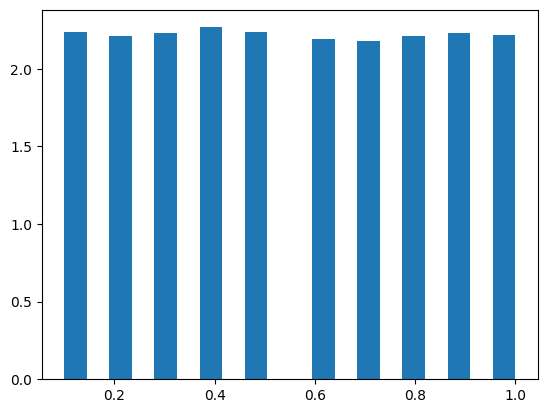

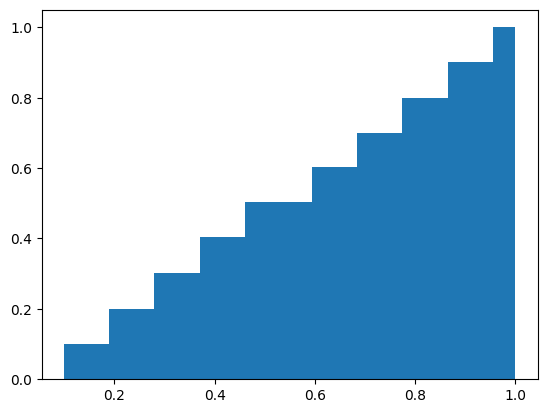



  ********** Feat Shift **********


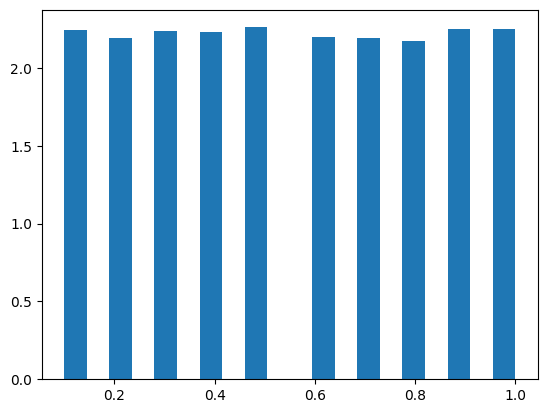

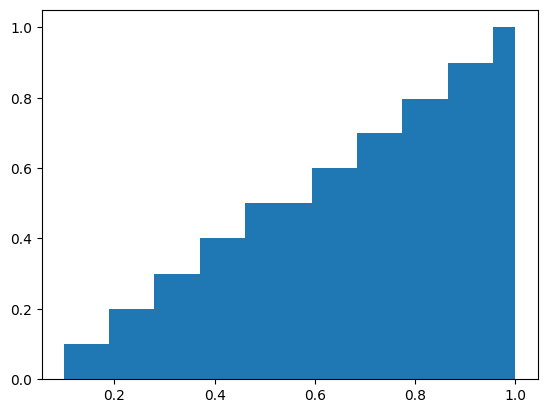



  ********** Cond Shift 1 **********


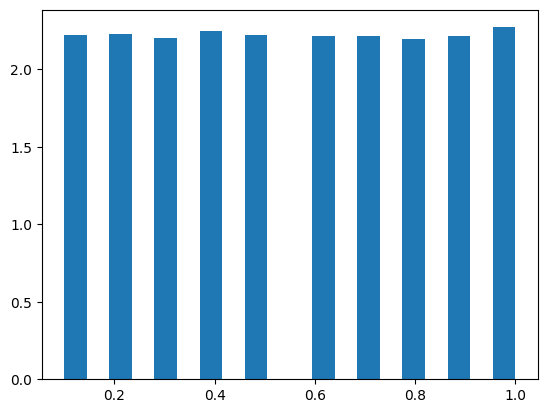

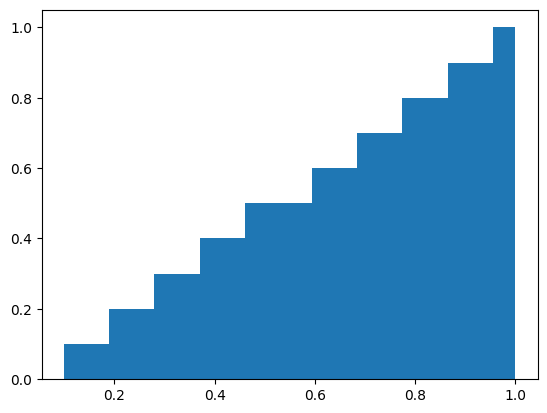



  ********** Cond Shift 2 **********


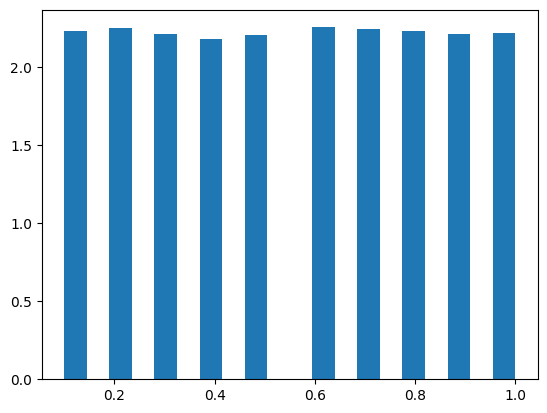

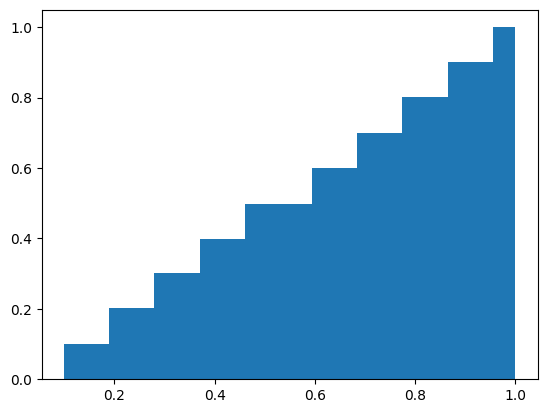



  ********** Total Shift **********


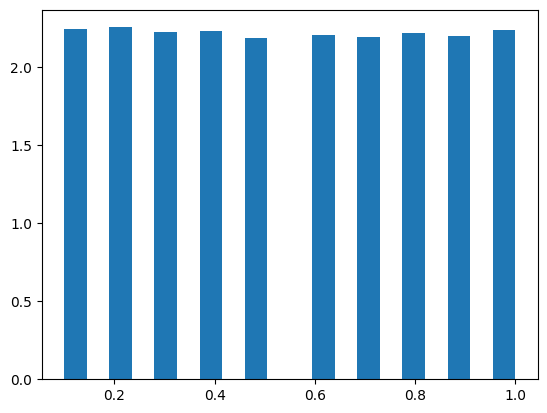

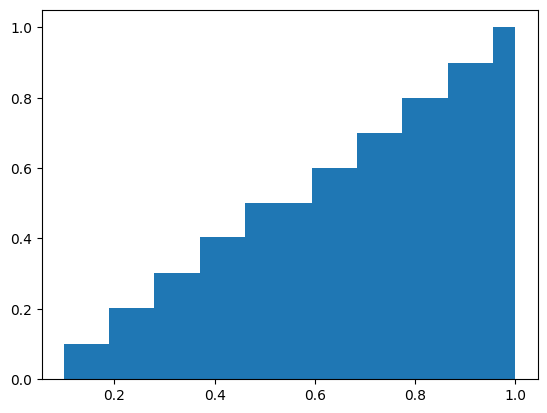

In [7]:
names=['Resp Shift', 'Feat Shift', 'Cond Shift 1', 'Cond Shift 2', 'Total Shift']

for i in range(5):
    print("\n\n  **********",names[i],"**********")
    plt.hist(pvals[:,i+2], cumulative=False, density=True, bins=20)
    plt.show()
    plt.hist(pvals[:,i+2], cumulative=True, density=True, bins=20)
    plt.show()